#¿Cómo predecir la satisfacción de pasajeros de una aerolínea?
#####La satisfacción del cliente es cada vez más relevante en todas las industrias, en particular las que proveen servicios, como puede ser una aerolínea.
#####Una buena experiencia puede generar lealtad hacia una empresa mientras que si es mala, la persona puede ser detractora incluso al nivel de instar a conocidos a no contratar los servicios de ésta.
#####Dada una base histórica de usuarios de una aerolínea, se busca poder predecir si una persona va a estar satisfecha o neutral/insatisfecha respecto al vuelo que tomó.
#####Se busca determinar cuáles son las variables más relevantes para predecir la satisfacción. Pueden ser referidas a la persona como su edad, género o motivo de viaje. Es esperable que el comportamiento o respuesta a disintos aspectos del vuelo no sean iguales para una persona joven o una de mayor edad o, en el mismo sentido, un turista vs alguien que viaja por negocios.
#####Hay otras variables propias del vuelo como duración, clase, horario de partida.
#####Se cuenta también con variables donde el usuario puntuó del 1 al 5 aspectos referidos al vuelo. Ejemplos de esto son la "limpieza", la "facilidad para reservar", el "comfort del asient". Probablemente la importancia que el usuario le dé a cada una de estas valoraciones no sea la misma y algunas serán más determinantes que otras.
#####Este es un problema de clasificación de aprendizaje de tipo supervisado. El modelo final deberá determinar la categoría binaria del nuevo cliente. Se destinará parte de la base histórica al entrenamiento del modelo y luego otra parte, un poco menor, al testeo del mismo, para evaluar así la precisión.
######(al final del notebook se encuentra el significado de cada columna del data set)

##Contexto comercial
#####La industria aeronáutica tiene un contexto cada vez más competitivo, aún más luego de la pandemia. La satisfacción del cliente respecto al vuelo es clave a la hora de fidelizarlos y que vuelvan a elegir a la empresa.
#####La empresa ha recopilado detalles de un número grande de pasajeros respecto al vuelo que tomaron y caracteríticas propias de las personas y una valoración de varios aspectos junto con el grado final de satisfacción de estas.
#####La empresa me ha contratado para construir un modelo análitico para anticipar si un usuario va estar satisfecho o no con su vuelo y cuáles son las variables más relevantes a tener en cuenta para asegurar un buen resultado.

##Problema comercial
#####Mi tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, como en qué aspectos se debería hacer foco para hacer más eficiente lograr la satisfacción del cliente.
#####También debo crear un modelo paa anticiparme a posibles malas experiencias y realizar acciones proactivas (bonificaciones, regalos) en casos donde sea más probable que el usuario no quede satifecho (ejemplo: demoras por fuerza mayor

##Objetivo
#####Predecir qué usuario va a estar satisfecho y qué usuario va a estar neutral/insatisfecho utilizando los parámetros definidos y provistos por la empresa

##Contexto analítico
#####Se me proporciona un archivo CSV con datos de los usuarios, datos del vuelvo, valoraciones de los usuarios de aspectos del vuelvo y clasificación de grado de satisfacción final de los usuarios (satisfecho o neutral/insatisfecho)
#####Realizaré las siguientes tareas con los datos:
#####-Leer, transformar y preparar datos para su visualización
#####-Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
#####Análisis descriptivo:
#####-¿Cuál es el tipo de usuario más proclive a la insatisfacción de la semana con más vuelos?

##Tabla de contenidos
#####1 - Importando librerías
#####2 - Cargando el Dataset
#####3 - Limpieza
#####4 - Análisis exploratio de datos (EDA)
#####5 - Modelado

##Importar librerías necesarias


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
sns.set_style('whitegrid')
#install library
!pip install missingno
import missingno as msno


##Carga de Dataset

In [2]:
import httpimport


with httpimport.github_repo('JoaquinArmesto', 'pywip', ref='master'):
  from datacapture import DataCapture

In [3]:
df  = (DataCapture("https://drive.google.com/file/d/1p7Tk5NQdb8rftFmFB_eQ7Fk86nNbsC8Q/view?usp=drive_link").capture()).dataframe
display_df  = df

display_df.index = [''] * display_df.shape[0]

##Limpieza de datos

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries,  to 
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      103904 non-null 

In [11]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

<Axes: >

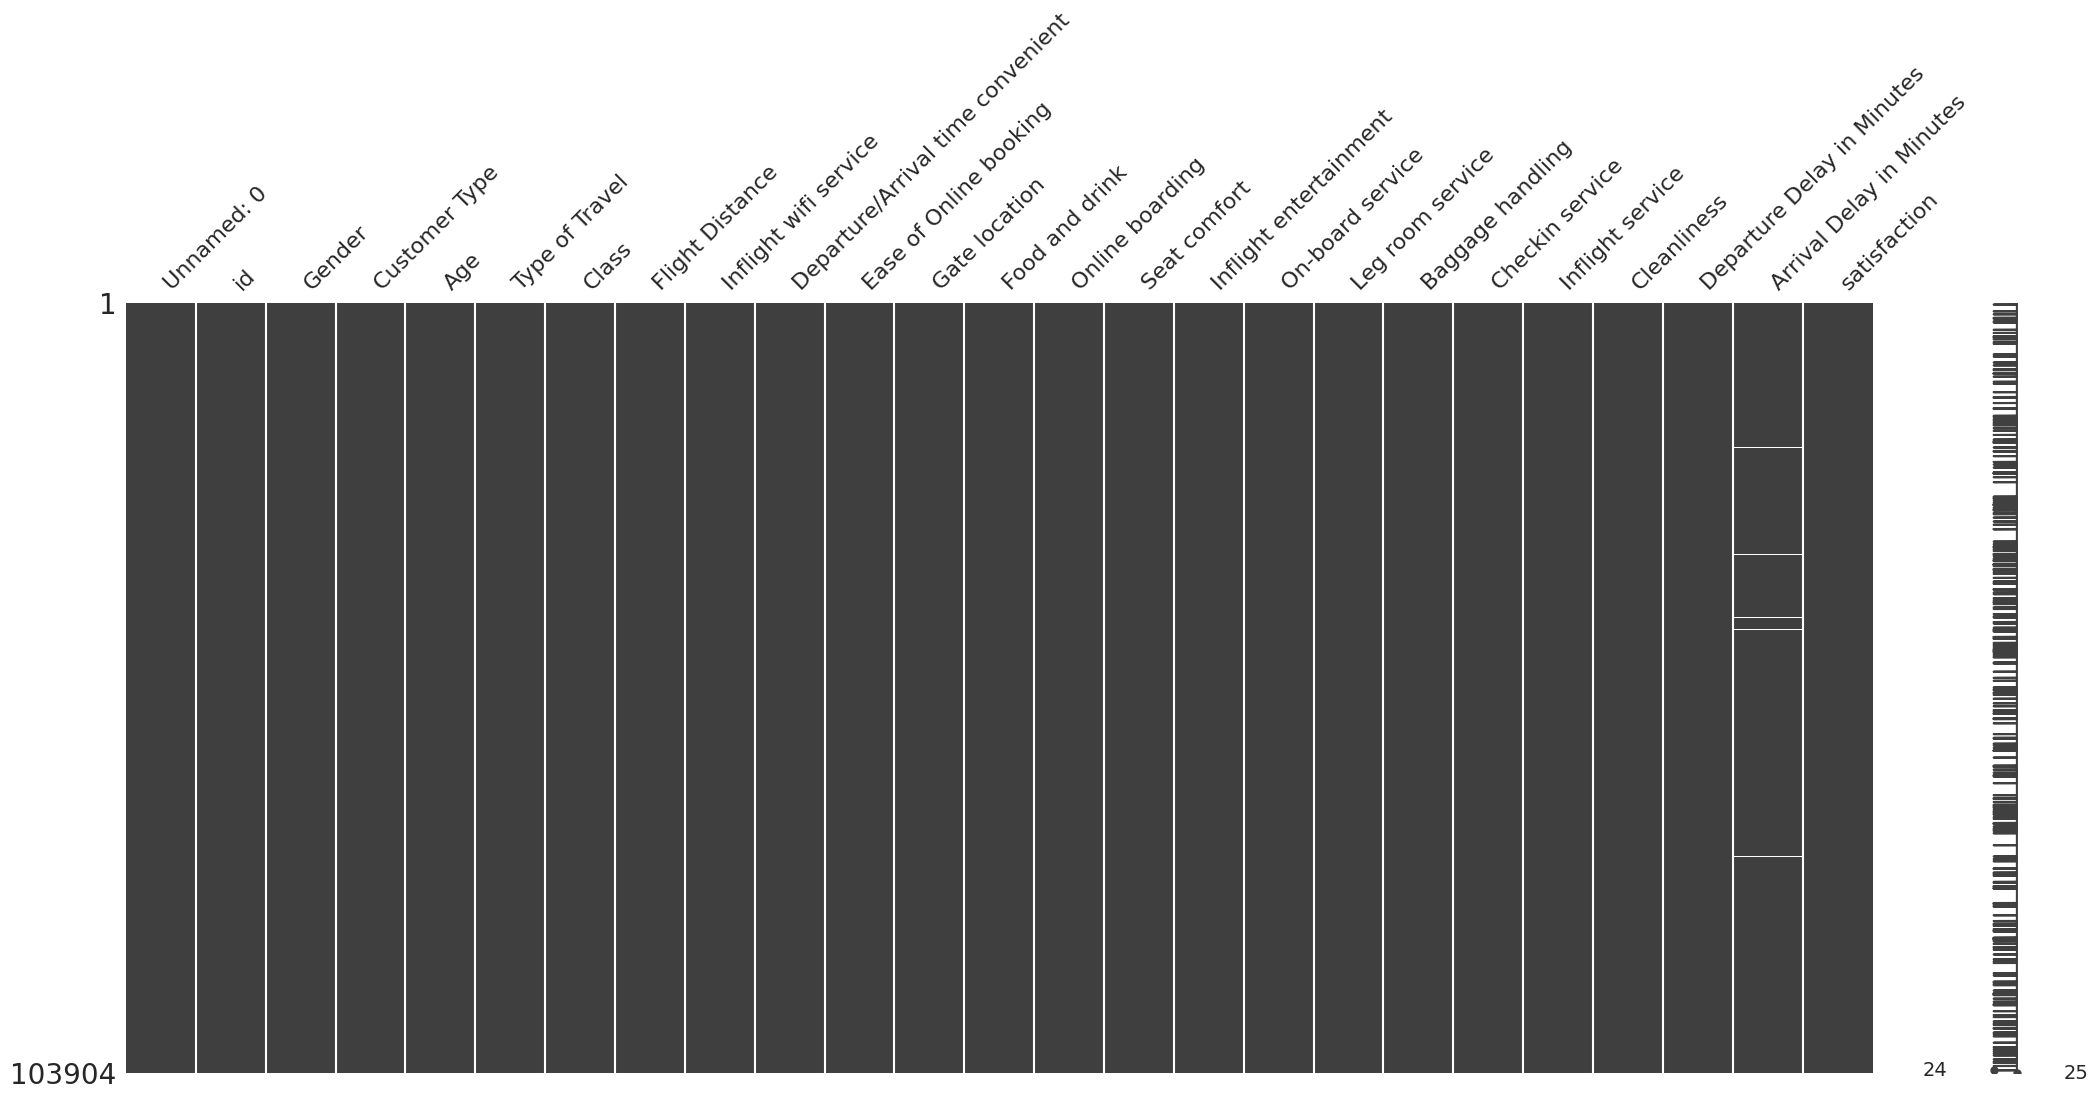

In [6]:
#Create matrix plot
msno.matrix(df)

#####Hay muy pocos valores nulos y ocurren en una sola columna. Procedo a eliminarlos

In [7]:
df.dropna(inplace=True)

In [8]:
#me fijo si hay IDs duplicados
duplicates = df["id"].duplicated()
duplicated_rows = df[duplicates]
num_duplicates = duplicates.sum()
num_duplicates

0

####Quiero revisar cuántos outliers tiene cada columna númerica

In [9]:
# Calculamos el z-score
df['Age_z'] = (df['Age'] - df['Age'].mean())/df['Age'].std()
# Creamos una variable para marcar los outliers
df['Age_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['Age_z']>3)|(df['Age_z']<-3) , 'Age_outliers'] = -1
# Veamos los casos marcados
df['Age_outliers'].value_counts()

 0    103577
-1        17
Name: Age_outliers, dtype: int64

In [10]:
# Calculamos el z-score
df['Flight Distance_z'] = (df['Flight Distance'] - df['Flight Distance'].mean())/df['Flight Distance'].std()
# Creamos una variable para marcar los outliers
df['Flight Distance_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['Flight Distance_z']>3)|(df['Flight Distance_z']<-3) , 'Flight Distance_outliers'] = -1
# Veamos los casos marcados
df['Flight Distance_outliers'].value_counts()

 0    103536
-1        58
Name: Flight Distance_outliers, dtype: int64

In [11]:
# Calculamos el z-score
df['Departure Delay in Minutes_z'] = (df['Departure Delay in Minutes'] - df['Departure Delay in Minutes'].mean())/df['Departure Delay in Minutes'].std()
# Creamos una variable para marcar los outliers
df['Departure Delay in Minutes_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['Departure Delay in Minutes_z']>3)|(df['Departure Delay in Minutes_z']<-3) , 'Departure Delay in Minutes_outliers'] = -1
# Veamos los casos marcados
df['Departure Delay in Minutes_outliers'].value_counts()

 0    101398
-1      2196
Name: Departure Delay in Minutes_outliers, dtype: int64

In [12]:
# Calculamos el z-score
df['Arrival Delay in Minutes_z'] = (df['Arrival Delay in Minutes'] - df['Arrival Delay in Minutes'].mean())/df['Arrival Delay in Minutes'].std()
# Creamos una variable para marcar los outliers
df['Arrival Delay in Minutes_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['Arrival Delay in Minutes_z']>3)|(df['Arrival Delay in Minutes_z']<-3) , 'Arrival Delay in Minutes_outliers'] = -1
# Veamos los casos marcados
df['Arrival Delay in Minutes_outliers'].value_counts()

 0    101369
-1      2225
Name: Arrival Delay in Minutes_outliers, dtype: int64

In [13]:
df = df.loc[~(df == -1).any(axis=1)]

In [14]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age_z,Age_outliers,Flight Distance_z,Flight Distance_outliers,Departure Delay in Minutes_z,Departure Delay in Minutes_outliers,Arrival Delay in Minutes_z,Arrival Delay in Minutes_outliers
,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,-1.745533,0,-0.731302,0,0.268965,0,0.072905,0
,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,-0.951522,0,-0.956912,0,-0.360680,0,-0.237183,0
,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,-0.885354,0,-0.047453,0,-0.386915,0,-0.392227,0
,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,-0.951522,0,-0.629025,0,-0.098328,0,-0.159661,0
,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1.430514,0,-0.977968,0,-0.386915,0,-0.392227,0


In [15]:
columnas_a_eliminar = [
    "Age_z",
    "Age_outliers",
    "Flight Distance_z",
    "Flight Distance_outliers",
    "Departure Delay in Minutes_z",
    "Departure Delay in Minutes_outliers",
    "Arrival Delay in Minutes_z",
    "Arrival Delay in Minutes_outliers"
]

In [16]:
 df = df.drop(columnas_a_eliminar, axis=1)

##Análisis exploratorio de datos

####¿Hay algun grupo de personas que tienda más a la insatisfacción?


In [17]:
df_dissast_percent = df.groupby('Gender')['satisfaction'].value_counts(normalize=True).mul(100).rename('%').reset_index()
df_dissast_percent = df_dissast_percent.query("satisfaction == 'neutral or dissatisfied'")
df_dissast_percent

,Gender,satisfaction,%
0,Female,neutral or dissatisfied,57.111934
2,Male,neutral or dissatisfied,55.845069


Text(0.5, 1.0, '%Insatisfechos por género')

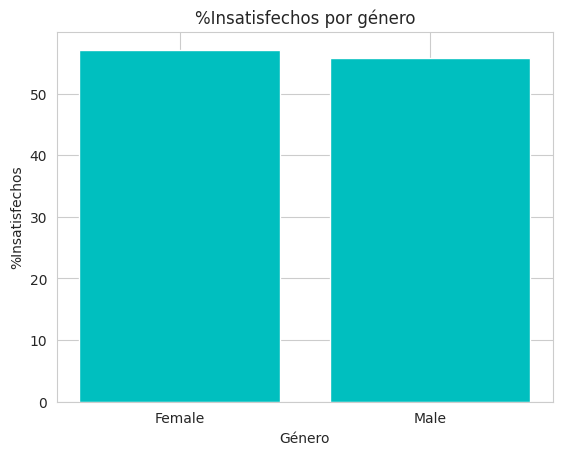

In [23]:
# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los datos en el eje
ax.bar(df_dissast_percent ['Gender'], df_dissast_percent ['%'], color='c')
# Personalizar el gráfico
ax.set_xlabel('Género')
ax.set_ylabel('%Insatisfechos')
ax.set_title('%Insatisfechos por género')

#####No hay una diferencia muy grande entre géneros a la hora de puntuar, al menos en esta primera lectura

####¿Cuánto influye la distancia de vuelo en la insatifacción?




<ipython-input-24-afa525979210>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


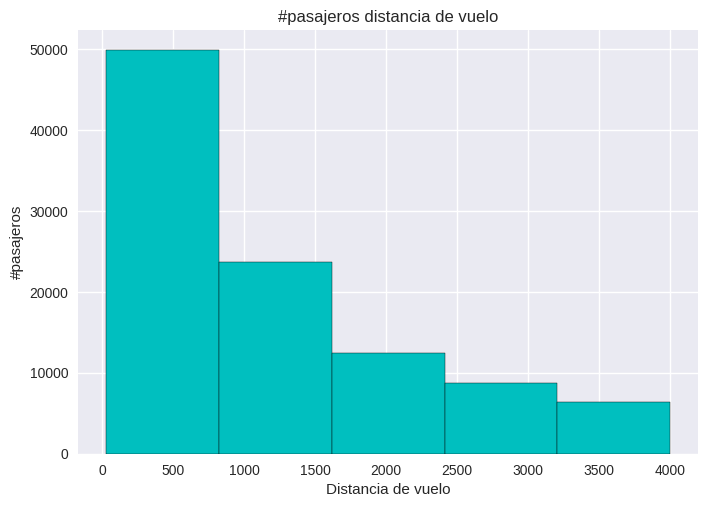

In [24]:
plt.style.use('seaborn')
plt.hist(df['Flight Distance'], bins=5, color='c', edgecolor='black')
plt.xlabel('Distancia de vuelo')
plt.ylabel('#pasajeros')
plt.title('#pasajeros distancia de vuelo')
plt.show()

In [26]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [25]:
# Definir los rangos para los tiempos de vuelo
bins = [0, 1000, 2000,3000, 4000]  # Define los límites de los rangos

# Agregar una nueva columna al DataFrame con los rangos correspondientes
df['RangoDistancia'] = pd.cut(df['Flight Distance'], bins=bins, labels=['<1000', '2000-3000', '3000-4000', '4000'])


In [26]:
df_distance_percent = df.groupby('RangoDistancia')['satisfaction'].value_counts(normalize=True).mul(100).rename('%').reset_index()
df_distance_percent = df_distance_percent.query("satisfaction == 'neutral or dissatisfied'")
df_distance_percent

,RangoDistancia,satisfaction,%
0,<1000,neutral or dissatisfied,66.883195
2,2000-3000,neutral or dissatisfied,53.717225
5,3000-4000,neutral or dissatisfied,35.079353
7,4000,neutral or dissatisfied,22.202753


In [29]:
fig = px.bar(df_distance_percent, x=df_distance_percent['RangoDistancia'], y=df_distance_percent['%'], title='%Insatisfechos por Distancia')
fig.update_xaxes(title_text='Distancia')
fig.update_yaxes(title_text='%Insatisfechos')
fig.show()

#####Contrario a lo esperado, la insatisfacción cae a medida que los vuelos son más largos.

####¿Cuánto afecta la clase en la satisfacción?


In [30]:
df_class_percent = df.groupby('Class')['satisfaction'].value_counts(normalize=True).mul(100).rename('%').reset_index()
df_class_percent = df_class_percent.query("satisfaction == 'neutral or dissatisfied'")
df_class_percent

,Class,satisfaction,%
1,Business,neutral or dissatisfied,30.387231
2,Eco,neutral or dissatisfied,81.273804
4,Eco Plus,neutral or dissatisfied,75.292498


In [31]:
fig = px.bar(df_class_percent, x=df_class_percent['Class'], y=df_class_percent['%'], title='%Insatisfechos por Clase',category_orders={'Class': ['Business', 'Eco Plus', 'Eco']})
fig.update_xaxes(title_text='Clase')
fig.update_yaxes(title_text='%Insatisfechos')
fig.show()

#####Como era esperable el % de insatisfechos en clase business es bastante menor a las de clases Economy. Sin embargo, entre Eco y Eco Plus el % de insatifechos es bastante similar y sorprende que sea tan alto

##Modelado

###Encoding
#####Convertimos las variables categóricas a númericas

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["Gender"])
df["Gender"] = le.transform(df["Gender"])


In [33]:
le.fit(df["Customer Type"])

df["Customer Type"] = le.transform(df["Customer Type"])

In [34]:
le.fit(df["Type of Travel"])
df["Type of Travel"] = le.transform(df["Type of Travel"])


In [35]:
le.fit(df["Class"])
df["Class"] = le.transform(df["Class"])

###Defino X e Y del modelo

In [36]:
X = df[['Gender', 'Customer Type', 'Age', 'Type of Travel','Class', 'Flight Distance', 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']]
Y = df['satisfaction'].replace({'neutral or dissatisfied':0, 'satisfied':1})

In [37]:
# Separamos en entrenamiento/test en razon 70/30 %
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=42)


###Primera iteración
####A modo de ejemplo, voy a ver todo calcular la accuracy del modelo KNN paso a paso.
####Luego voy a usar el Lazy predict para elegir los mejores dos modelos para mejorarlos

####KNN

In [38]:
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import confusion_matrix
 from sklearn import metrics
 sns.set_style('whitegrid')

In [39]:
# Separamos en entrenamiento/test en razon 70/30 %
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

# Crear la instancia del modelo
clf_knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos y la etiqueta
clf_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# Obtenemos las predicciones del modelo con X_test
preds = clf_knn.predict(X_test)

####Está bastante balanceado entre satifechos e insatisfechos/neutrales por lo que puedo usar accuracy para evaluar al modelo

In [41]:
Y.value_counts()
Y.value_counts(normalize=True).round(2)


0    0.56
1    0.44
Name: satisfaction, dtype: float64

In [42]:
# Creando la matriz de confusión
cm = confusion_matrix(Y_test, preds)
cm

array([[13516,  3610],
       [ 4295,  8897]])

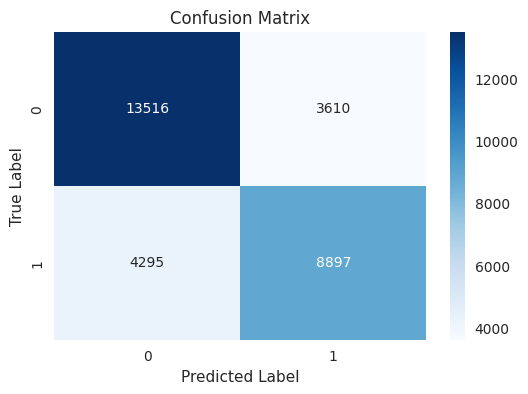

In [43]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
#Clase 1: satisfied
#Clase 0: neutral or dissatisfied

In [44]:
accuracy_knn = metrics.accuracy_score(Y_test, preds)
accuracy_knn

0.7392638036809815

####Lazy predict me permite evaluar rápidamente varios modelos y quedarme con los mejores

In [45]:
 #from lazypredict.Supervised import LazyClassifier

In [46]:
# Importing LazyRegressor
#from lazypredict.Supervised import LazyClassifier
# https://pypi.org/project/lazypredict/

#https://www.geeksforgeeks.org/lazy-predict-library-in-python-for-machine-learning/

In [47]:
#lazy_clf= LazyClassifier(verbose=0,
#					ignore_warnings=False,
#					custom_metric=None)

# fitting data in LazyClassifier
#models, predictions = lazy_clf.fit(X_train, X_test,
					#		y_train, y_test)
#models

####Falló Lazypredict
#####Tu sesión falló porque se usó toda la RAM disponible. Si quieres acceder a entornos de ejecución de RAM amplia, consulta Colab Pro.

####Proceso a calcular accuracy de "LogisticRegression", "RandomForestClassifier","DecisionTreeClassifier" y "XGBoost"

####Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
clf_logistic = LogisticRegression(solver='liblinear')

In [50]:
clf_logistic.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [51]:
preds_logistic = clf_logistic.predict(X_test)

In [52]:
accuracy_logistic = metrics.accuracy_score(Y_test, preds_logistic)
accuracy_logistic

0.8753215911339798

####Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
clf_random_forest = RandomForestClassifier(n_estimators=100)

In [55]:
clf_random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [57]:
preds_forest = clf_random_forest.predict(X_test)

In [58]:
accuracy_forest = metrics.accuracy_score(Y_test, preds_forest)
accuracy_forest

0.9617389009829145

####Árbol de decisión

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
clf_decision_tree = DecisionTreeClassifier()

In [61]:
clf_decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [62]:
preds_tree = clf_decision_tree.predict(X_test)

In [63]:
accuracy_tree = metrics.accuracy_score(Y_test, preds_tree)
accuracy_tree

0.9459067220792928

####XGBoost

In [64]:
from xgboost import XGBClassifier

In [65]:
clf_xgboost = XGBClassifier()

In [66]:
clf_xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
preds_xg = clf_xgboost.predict(X_test)

In [68]:
accuracy_xg = metrics.accuracy_score(Y_test, preds_xg)
accuracy_xg

0.9618378521010621

####Conclusiones primera iteración
#####De los cinco modelos testeados XGBoost y Random Forest son los mejores con accuracies de 0,9618 y 0,9617 respectivamente

###Segunda iteración
#####Aplico Halving grid search a los dos mejores modelos

In [69]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

####XGBoost

In [70]:
param_grid = {'n_estimators': np.arange(100,400,100),  # Número de árboles en el bosque
    'max_depth': [5, 10, 15],  # Profundidad máxima de cada árbol
    'min_samples_split': [10, 20, 30],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [5,9],  # Número mínimo de muestras requeridas en cada hoja del árbol
    'gamma':[i/10.0 for i in range(1,8,2)],
    'alpha':np.arange(0.1,0.8,0.2)
}

clf_xgboost_cv = HalvingGridSearchCV(clf_xgboost, param_grid=param_grid, cv=5, min_resources=100, scoring='accuracy', n_jobs=-1, verbose=2)

clf_xgboost_cv.fit(X_train, Y_train)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 100
max_resources_: 70739
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 864
n_resources: 100
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
----------
iter: 1
n_candidates: 288
n_resources: 300
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 2
n_candidates: 96
n_resources: 900
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 32
n_resources: 2700
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 11
n_resources: 8100
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 4
n_resources: 24300
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[18:10:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.




HalvingGridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=Non...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...),
                    min_resources=100, n_jobs=-1,
                    param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7]),
                                'gamma': [0.1, 0.3, 0.5, 0.7],
                                'max_depth': [5, 10, 15],
                                'min_samples_leaf': [5, 9],
                                'min_samples_split': [10, 20, 30],
                                'n_estimators': array([100, 200, 300])},
                    scoring='accuracy', verbose=2)

In [74]:
Y_train_pred = clf_xgboost_cv.predict(X_train) #Prediccion en Train
Y_test_pred = clf_xgboost_cv.predict(X_test) #Prediccion en Test
# Calcular la precisión
accuracy_XGBoost = metrics.accuracy_score(Y_test, Y_test_pred)
print('XGBoost Model accuracy score: {0:0.3f}'.format(accuracy_XGBoost ))

XGBoost Model accuracy score: 0.963


In [76]:
# Obtener los scores de todas las combinaciones de parámetros
results = clf_xgboost_cv.cv_results_
results

# guardemos lo más importante dentro de un dataframe
df_clf_xgboost_cv = pd.DataFrame(results)

df_clf_xgboost_cv["mean_test_score_10%"]=accuracy_XGBoost

df_clf_xgboost_cv = df_clf_xgboost_cv[['mean_train_score', 'mean_test_score',  "mean_test_score_10%" ,'params']]
df_clf_xgboost_cv= df_clf_xgboost_cv.round(3).sort_values("mean_test_score", ascending=False)[:1]
df_clf_xgboost_cv["model"]="XGBoost"

df_clf_xgboost_cv

,mean_train_score,mean_test_score,mean_test_score_10%,params,model
1293,0.999,0.959,0.963,"{'alpha': 0.5000000000000001, 'gamma': 0.1, 'm...",XGBoost


####Random Forest

In [82]:
param_grid = {'n_estimators': [100, 300],  # Número de árboles en el bosque
    'max_depth': [5, 15],  # Profundidad máxima de cada árbol
    'min_samples_split': [5, 15],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [4, 6]  # Número mínimo de muestras requeridas en cada hoja del árbol
    #'bootstrap': [True, False]  # Indica si se debe realizar bootstrap para construir los árboles
}
#Aplicamos la grilla al modelo
#Utilizamos la grilla definida anteriormente...
clf_random_forest_cv = HalvingGridSearchCV(clf_random_forest, param_grid=param_grid, factor=4, cv=5,  scoring='accuracy', n_jobs=-1, verbose=2)

In [83]:
#Entrenamos RF con la grilla definida arriba y CV con tamaño de Fold=5
clf_random_forest_cv.fit(X_train, Y_train)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 4421
max_resources_: 70739
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 16
n_resources: 4421
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 4
n_resources: 17684
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 2
n_candidates: 1
n_resources: 70736
Fitting 5 folds for each of 1 candidates, totalling 5 fits


HalvingGridSearchCV(estimator=RandomForestClassifier(), factor=4, n_jobs=-1,
                    param_grid={'max_depth': [5, 15],
                                'min_samples_leaf': [4, 6],
                                'min_samples_split': [5, 15],
                                'n_estimators': [100, 300]},
                    scoring='accuracy', verbose=2)

In [85]:
Y_train_pred = clf_random_forest_cv.predict(X_train) #Prediccion en Train
Y_test_pred = clf_random_forest_cv.predict(X_test) #Prediccion en Test
# Calcular la precisión
accuracy_forest = metrics.accuracy_score(Y_test, Y_test_pred)
print('Random Forest Model accuracy score: {0:0.3f}'.format(accuracy_forest))

Random Forest Model accuracy score: 0.957


In [87]:
# Obtener los scores de todas las combinaciones de parámetros
results = clf_random_forest_cv.cv_results_
results

# guardemos lo más importante dentro de un dataframe
df_clf_random_forest_cv = pd.DataFrame(results)

df_clf_random_forest_cv["mean_test_score_10%"]=accuracy_tree

df_clf_random_forest_cv = df_clf_random_forest_cv[['mean_train_score', 'mean_test_score',  "mean_test_score_10%" ,'params']]
df_clf_random_forest_cv= df_clf_random_forest_cv.round(3).sort_values("mean_test_score", ascending=False)[:1]
df_clf_random_forest_cv["model"]="RandomForest"

df_clf_random_forest_cv

,mean_train_score,mean_test_score,mean_test_score_10%,params,model
20,0.97,0.956,0.946,"{'max_depth': 15, 'min_samples_leaf': 4, 'min_...",RandomForest


####Conclusiones segunda iteración
#####Halving grid search me permitió mejorar la accuracy del modelo XGBoost:
#####XGBoost Model accuracy score: 0.963
#####En la primera iteración había logrado un 0.9618

###Tercera iteración
#####Uso Grid search para XGBoost

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
param_grid = {'n_estimators': np.arange(100,400,100),  # Número de árboles en el bosque
    'max_depth': [5, 10, 15],  # Profundidad máxima de cada árbol
    'min_samples_split': [10, 20, 30],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [5,9],  # Número mínimo de muestras requeridas en cada hoja del árbol
    'gamma':[i/10.0 for i in range(1,8,2)],
    'alpha':np.arange(0.1,0.8,0.2)
}

clf_xgboost_cv_GS = GridSearchCV(clf_xgboost, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

clf_xgboost_cv_GS.fit(X_train, Y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[20:41:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.3, 0.5, 0.7]),
                         'gamma': [0.1, 0.3, 0.5, 0.7],
                         'max_depth': [5, 10, 15], 'min_samples_leaf': [5, 9],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': array([100, 200, 300])},
             scoring='accuracy', verbose=2)

In [99]:
clf_xgboost_cv_GS.best_params_

{'alpha': 0.30000000000000004,
 'gamma': 0.5,
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [100]:
modelo_xg=clf_xgboost_cv_GS.best_estimator_
modelo_xg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[20:48:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.




XGBClassifier(alpha=0.30000000000000004, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, min_samples_leaf=5, min_samples_split=10,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=100, ...)

In [101]:
y_pred_test_xg = modelo_xg.predict(x_test)

In [102]:
print("Mejores parametros: "+str(clf_xgboost_cv_GS.best_params_))
print("Mejor Score: "+str(clf_xgboost_cv_GS.best_score_)+'\n')

Mejores parametros: {'alpha': 0.30000000000000004, 'gamma': 0.5, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}
Mejor Score: 0.9631744914593705



###Anexo


Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)